# Python and R

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart

Some thoughts on why I like this setup and how I use it at the [end](notebook.ipynb#Thoughts) of  this notebook.

In [42]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [44]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
# require('theme538')
require('tidyverse')


In [45]:
pd.read_csv('https://raw.githubusercontent.com/laurabejder/federal_judges_appointment/main/data.csv')

,name,circuit,confirmation_date,nomination_no,congress_no,session,democrats,republicans,independents,record_vote_number,yea_votes,nay_votes,vote_id,D_yea,D_nay,D_no_vote,R_yea,R_nay,R_no_vote,I_yea,I_nay,I_no_vote,votes
0,Roopali H. Desai,Ninth,2022-08-04,PN2262,117,2,48,50,2,284.0,67.0,29.0,1172284,46,0,2,19,29,2,2,0,0,"[['Baldwin (D-WI)', ' Yea'], ['Barrasso (R-WY)..."
1,Florence Y. Pan,District of Columbia,2022-09-20,PN2193,117,2,48,50,2,340.0,52.0,42.0,1172340,46,0,2,4,42,4,2,0,0,"[['Baldwin (D-WI)', ' Not Voting'], ['Barrasso..."
2,Sarah A. L. Merriam,Second,2022-09-15,PN2141,117,2,48,50,2,337.0,53.0,44.0,1172337,48,0,0,3,44,3,2,0,0,"[['Baldwin (D-WI)', ' Yea'], ['Barrasso (R-WY)..."
3,Lara E. Montecalvo,First,2022-09-14,PN2140,117,2,48,50,2,335.0,52.0,47.0,1172335,47,0,1,3,47,0,2,0,0,"[['Baldwin (D-WI)', ' Yea'], ['Barrasso (R-WY)..."
4,Salvador Mendoza Jr,Ninth,2022-09-12,PN1966,117,2,48,50,2,331.0,46.0,40.0,1172331,41,0,7,3,40,7,2,0,0,"[['Baldwin (D-WI)', ' Yea'], ['Barrasso (R-WY)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Terrence L. O'Brien,Tenth,2002-04-15,PN882,107,2,50,49,1,68.0,98.0,0.0,1072068,49,0,1,48,0,1,1,0,0,"[['Akaka (D-HI)', ' Yea'], ['Allard (R-CO)', '..."
190,Michael J. Melloy,Eighth,2002-02-11,PN881,107,2,50,49,1,21.0,91.0,0.0,1072021,48,0,2,42,0,7,1,0,0,"[['Akaka (D-HI)', ' Yea'], ['Allard (R-CO)', '..."
191,Michael W. McConnell,Tenth,2002-11-15,PN880,107,2,0,0,0,NaN,NaN,NaN,1072nan,0,0,0,0,0,0,0,0,0,[]
192,William J. Riley,Eighth,2001-08-02,PN458,107,1,50,49,1,270.0,97.0,0.0,1071270,49,0,1,47,0,2,1,0,0,"[['Akaka (D-HI)', ' Yea'], ['Allard (R-CO)', '..."


In [46]:
df_long = pd.read_csv('https://raw.githubusercontent.com/laurabejder/federal_judges_appointment/main/data.csv')\
    .query("record_vote_number.notna()")[
    ['name', 'D_yea', 'R_yea', 'I_yea']].melt(id_vars='name')

df_long.to_csv('long_df.csv', index=False)

df_long

,name,variable,value
0,Roopali H. Desai,D_yea,46
1,Florence Y. Pan,D_yea,46
2,Sarah A. L. Merriam,D_yea,48
3,Lara E. Montecalvo,D_yea,47
4,Salvador Mendoza Jr,D_yea,41
...,...,...,...
520,Barrington D. Parker,I_yea,1
521,Terrence L. O'Brien,I_yea,1
522,Michael J. Melloy,I_yea,1
523,William J. Riley,I_yea,1


In [47]:
# %%R -h 3000

# # EXAMPLE R CELL
# df <- read_csv('long_df.csv')
    
# ggplot(df, aes(y=name, x=value, fill=variable)) + 
#     geom_col() + 
#     geom_vline(aes(xintercept=50))

In [48]:
df_long = pd.read_csv('https://raw.githubusercontent.com/laurabejder/federal_judges_appointment/main/data.csv')\
    .query("record_vote_number.notna()")[
    ['name', 'congress_no', 'session', 'circuit', 'democrats','republicans','independents', 'D_yea', 'R_yea', 'I_yea','confirmation_date']]\
    .sort_values(by='confirmation_date', ascending=False)\
    .melt(id_vars=['name', 'congress_no', 'session', 'circuit', 'democrats','republicans','independents','confirmation_date'])

df_long.to_csv('long_df.csv', index=False)
df_long

,name,congress_no,session,circuit,democrats,republicans,independents,confirmation_date,variable,value
0,Florence Y. Pan,117,2,District of Columbia,48,50,2,2022-09-20,D_yea,46
1,Sarah A. L. Merriam,117,2,Second,48,50,2,2022-09-15,D_yea,48
2,Lara E. Montecalvo,117,2,First,48,50,2,2022-09-14,D_yea,47
3,Salvador Mendoza Jr,117,2,Ninth,48,50,2,2022-09-12,D_yea,41
4,Andre B. Mathis,117,2,Sixth,48,50,2,2022-09-08,D_yea,45
...,...,...,...,...,...,...,...,...,...,...
520,Edith Brown Clement,107,1,Fifth,50,49,1,2001-11-13,I_yea,1
521,Barrington D. Parker,107,1,Second,50,49,1,2001-10-11,I_yea,1
522,Sharon Prost,107,1,Federal,50,49,1,2001-09-21,I_yea,1
523,William J. Riley,107,1,Eighth,50,49,1,2001-08-02,I_yea,1


Rows: 525 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): name, circuit, variable
dbl  (6): congress_no, session, democrats, republicans, independents, value
date (1): confirmation_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


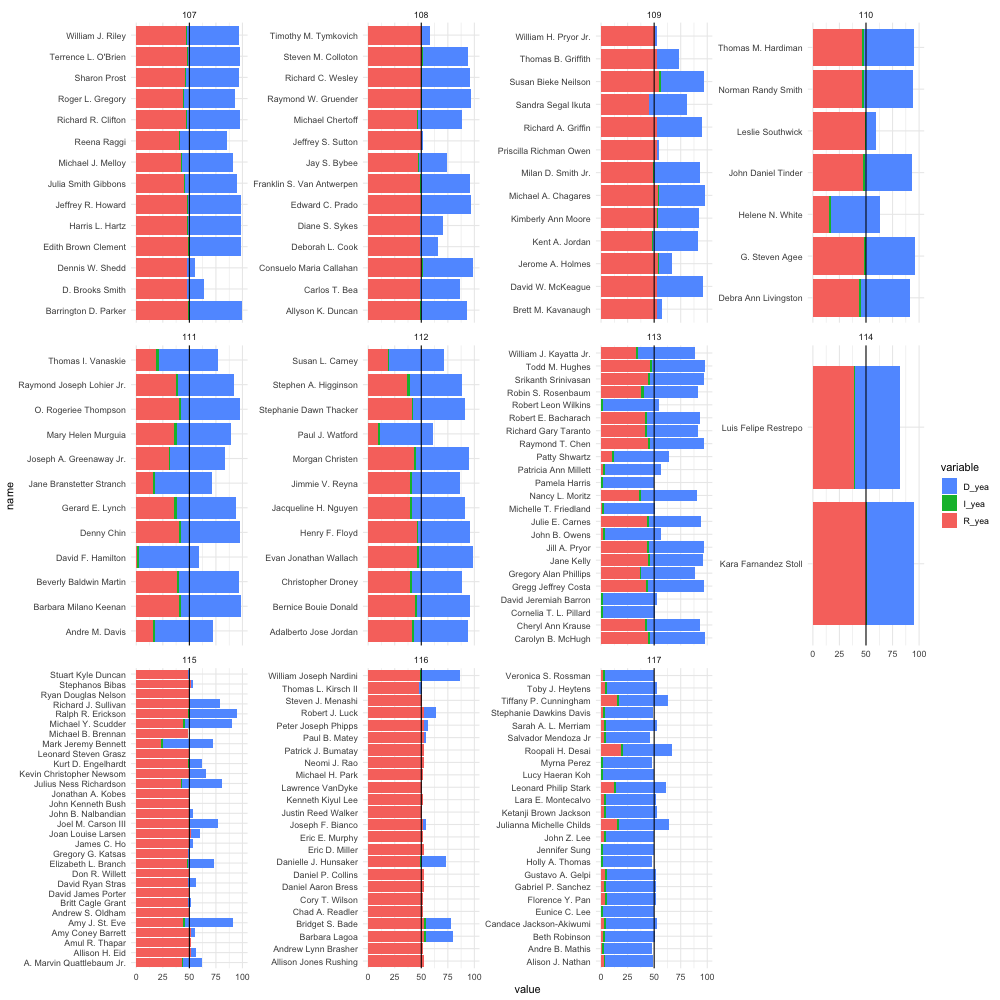

In [49]:
%%R -h 1000 -w 1000
require('tidyverse')
# EXAMPLE R CELL
df <- read_csv('long_df.csv') %>%
    select(c(name, value, variable, congress_no))
  
ggplot(df, aes(y=name, x=value, fill=variable)) + 
    geom_col() + 
    geom_vline(aes(xintercept=50)) +
    facet_wrap(~congress_no, scales='free_y')+
    scale_color_hue(direction = -1) +
    scale_fill_hue(direction = -1) +
    theme_minimal()

In [50]:
# Loading in the data without the judges confirmed by voice call (missing values)
raw_df = pd.read_csv('https://raw.githubusercontent.com/laurabejder/federal_judges_appointment/main/data.csv').query("record_vote_number.notna()")
df = raw_df[['name', 'confirmation_date', 'congress_no','democrats', 'republicans', 'independents', 'D_yea', 'R_yea', 'I_yea' ]]
melted_df = df.melt(id_vars=['name', 'confirmation_date', 'congress_no'])

def find_party(variable):
    if variable == 'democrats' or variable == 'D_yea':
        return 'Dem'
    elif variable == 'independents' or variable == 'I_yea':
        return 'Ind'
    elif variable == 'republicans' or variable == 'R_yea':
        return 'Rep'
    else:
        raise Exception("Party Not Found - you probably coded this function poorly")

melted_df['party'] = melted_df.variable.apply(find_party)
melted_df.to_csv('melted_df.csv', index=False)
melted_df

,name,confirmation_date,congress_no,variable,value,party
0,Roopali H. Desai,2022-08-04,117,democrats,48,Dem
1,Florence Y. Pan,2022-09-20,117,democrats,48,Dem
2,Sarah A. L. Merriam,2022-09-15,117,democrats,48,Dem
3,Lara E. Montecalvo,2022-09-14,117,democrats,48,Dem
4,Salvador Mendoza Jr,2022-09-12,117,democrats,48,Dem
...,...,...,...,...,...,...
1045,Barrington D. Parker,2001-10-11,107,I_yea,1,Ind
1046,Terrence L. O'Brien,2002-04-15,107,I_yea,1,Ind
1047,Michael J. Melloy,2002-02-11,107,I_yea,1,Ind
1048,William J. Riley,2001-08-02,107,I_yea,1,Ind


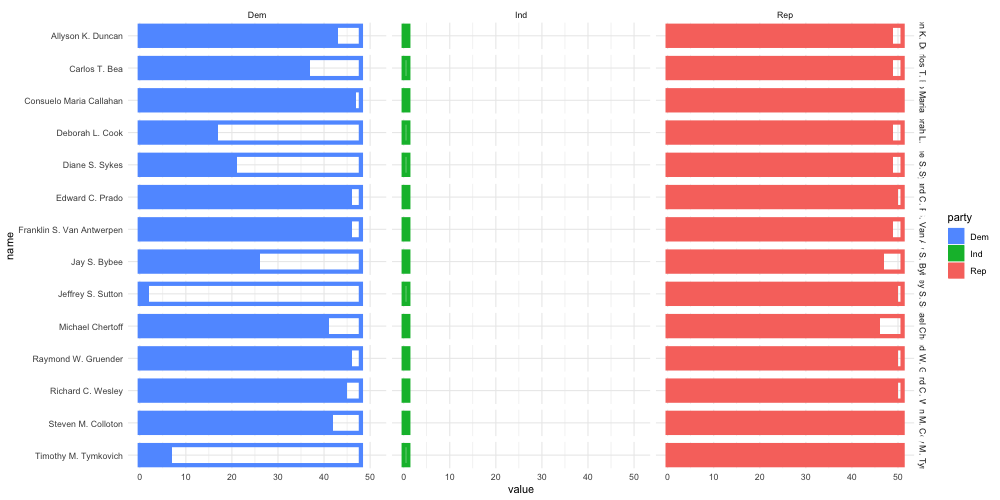

In [58]:
%%R -h 500 -w 1000

# EXAMPLE R CELL
df <- read_csv('melted_df.csv', show_col_types = FALSE)
df_totals <- df %>% filter(variable %in% c('democrats', 'republicans', 'independents'))
df_votes <- df %>% filter(variable %in% c('D_yea', 'R_yea', 'I_yea'))


ggplot(df%>% filter(congress_no==108), aes(y=name, x=value)) +
    geom_col(data=df_votes%>% filter(congress_no==108), aes(fill=party)) + 
    geom_col(data=df_totals%>% filter(congress_no==108), aes(color=party), size=2, alpha=0, fill='white') + 
    facet_grid(name~party,scales='free_y') +
    scale_color_hue(direction = -1) +
    scale_fill_hue(direction = -1) +
    theme_minimal()

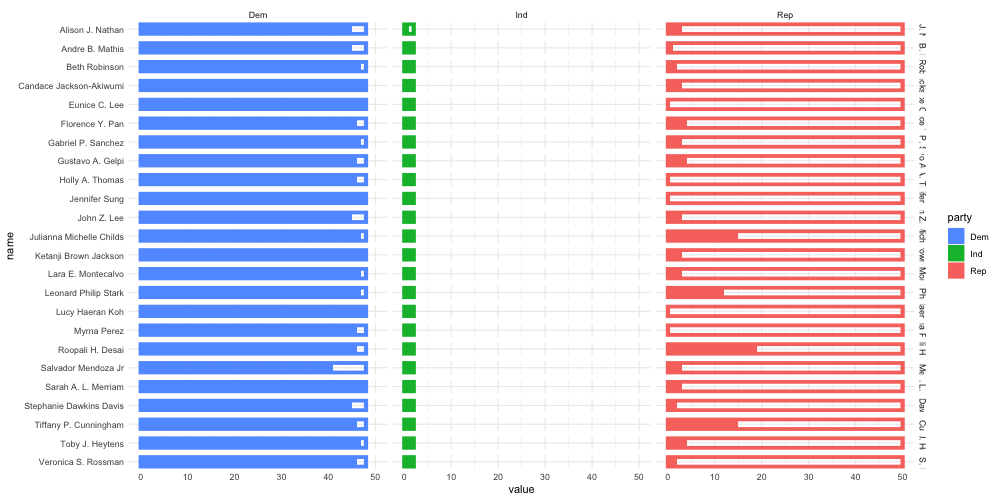

In [56]:
%%R -h 500 -w 1000

# EXAMPLE R CELL
df <- read_csv('melted_df.csv', show_col_types = FALSE)
df_totals <- df %>% filter(variable %in% c('democrats', 'republicans', 'independents'))
df_votes <- df %>% filter(variable %in% c('D_yea', 'R_yea', 'I_yea'))


ggplot(df%>% filter(congress_no==117), aes(y=name, x=value)) +
    geom_col(data=df_votes%>% filter(congress_no==117), aes(fill=party)) + 
    geom_col(data=df_totals%>% filter(congress_no==117), aes(color=party), size=2, alpha=0, fill='white') + 
    facet_grid(name~party,scales='free_y') +
    scale_color_hue(direction = -1) +
    scale_fill_hue(direction = -1) +
    theme_minimal()

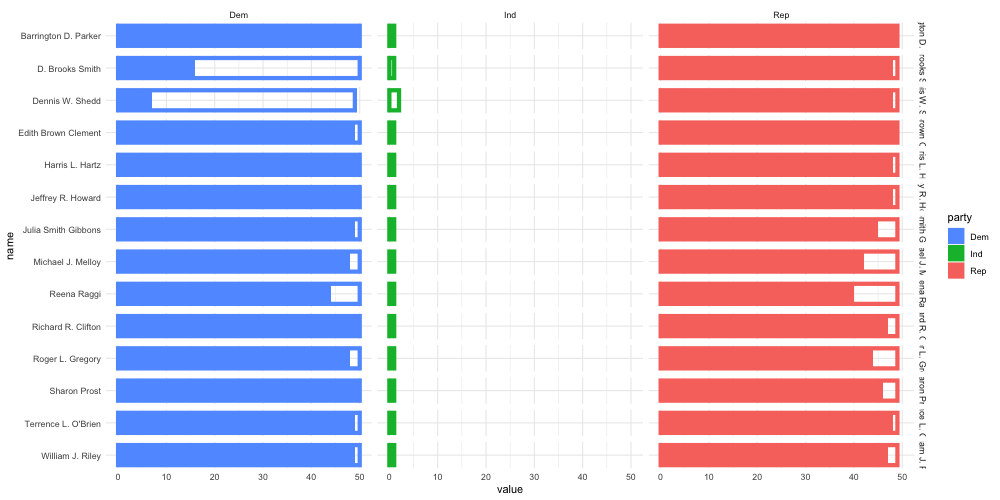

In [59]:
%%R -h 500 -w 1000

# EXAMPLE R CELL
df <- read_csv('melted_df.csv', show_col_types = FALSE)
df_totals <- df %>% filter(variable %in% c('democrats', 'republicans', 'independents'))
df_votes <- df %>% filter(variable %in% c('D_yea', 'R_yea', 'I_yea'))


ggplot(df%>% filter(congress_no==107), aes(y=name, x=value)) +
    geom_col(data=df_votes%>% filter(congress_no==107), aes(fill=party)) + 
    geom_col(data=df_totals%>% filter(congress_no==107), aes(color=party), size=2, alpha=0, fill='white') + 
    facet_grid(name~party,scales='free_y') +
    scale_color_hue(direction = -1) +
    scale_fill_hue(direction = -1) +
    theme_minimal()